<h1>What Is Data Visualization?</h1>
<hr>
<h3>“The representation of information in the form of a chart, diagram, picture, etc.”</h3>

<h6>
Use a simple bar chart showing the number of accidents per year (2019–2022) to illustrate how raw numbers become instantly understandable when visualized.
</h6>

In [2]:
import pandas as pd
df = pd.read_csv('datasets\\uk_road_accident.csv')
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
# Step 1: Convert to string only if not null
df['Accident Date'] = df['Accident Date'].astype(str)
# Step 2: Replace '/' with '-' safely
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# Step 3: Strip whitespace
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')


df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna('unaccounted')
df['Road_Type'] = df['Road_Type'].fillna('unaccounted')
df['Weather_Conditions'] = df['Weather_Conditions'].fillna('unaccounted')

df.dtypes
df.isnull().sum()

df['Year'] = df['Accident Date'].dt.year
df['Month'] =  df['Accident Date'].dt.month
df['Day'] =  df['Accident Date'].dt.day
df['DayOfWeek'] =  df['Accident Date'].dt.dayofweek
df.isnull().sum()

Index                       0
Accident_Severity           0
Accident Date               0
Latitude                    0
Light_Conditions            0
District Area               0
Longitude                   0
Number_of_Casualties        0
Number_of_Vehicles          0
Road_Surface_Conditions     0
Road_Type                   0
Urban_or_Rural_Area        15
Weather_Conditions          0
Vehicle_Type                0
Year                        0
Month                       0
Day                         0
DayOfWeek                   0
dtype: int64

<Axes: xlabel='Year'>

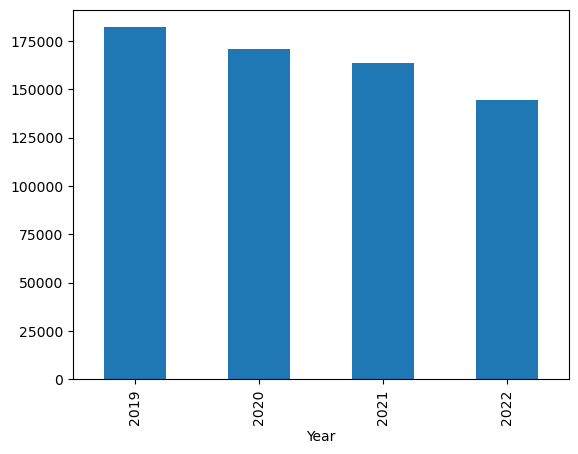

In [4]:
# Example: Bar chart of accident counts per year
import matplotlib.pyplot as plt
df.groupby('Year')['Index'].count().plot(kind='bar')

<h1>Why Is It Important?</h1>
<ul>
    <li><h4>Helps identify patterns, trends, and outliers.</h4> </li>
    <li><h4>Speeds up decision-making.</h4></li>
    <li><h4>Makes data accessible to non-technical stakeholders.</h4></li>
</ul>

<h4>
📊 Example Visualization: Line chart showing monthly accident trends over time. This reveals seasonal spikes (e.g., winter months, holidays).
</h4>

<h1>Types of Visualizations (with Dataset Examples)</h1>
<table>
    <tr>
        <th>
            Visualization Type
        </th>
        <th>
            UK Dataset Example
        </th>
        <th>
            Purpose
        </th>
    </tr>
    <tr>
        <td>
            Histogram
        </td>
        <td>
            Distribution of accident severity
        </td>
        <td>
            Show frequency of severity levels
        </td>
    </tr>
    <tr>
        <td>
            Heatmap
        </td>
        <td>
            Accidents by region vs. time of day
        </td>
        <td>
            Reveal hotspots and peak hours
        </td>
    </tr>
    <tr>
        <td>
            Box Plot
        </td>
        <td>
            Casualty age distribution
        </td>
        <td>
            Spot outliers and age concentration
        </td>
    </tr>
    <tr>
        <td>
            Pie Chart
        </td>
        <td>
            Proportion of accident causes
        </td>
        <td>
            Show relative contribution
        </td>
    </tr>
    <tr>
        <td>
            Stacked Bar Chart
        </td>
        <td>
            Road type vs. lighting condition
        </td>
        <td>
            Compare accident counts across categories
        </td>
    </tr>
</table>

<h1>Univariate Plotting </h1>
<h2>Focus on one variable at a time.</h2>

<h4>📌 Example: Histogram of vehicle types involved </h4>


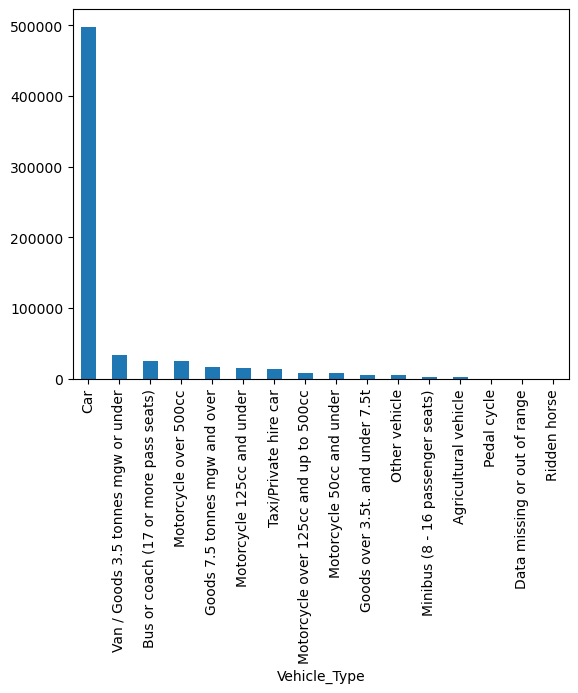

In [8]:

df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

In [9]:
nocar_df = df[df['Vehicle_Type'] != 'Car']
# nocar_df

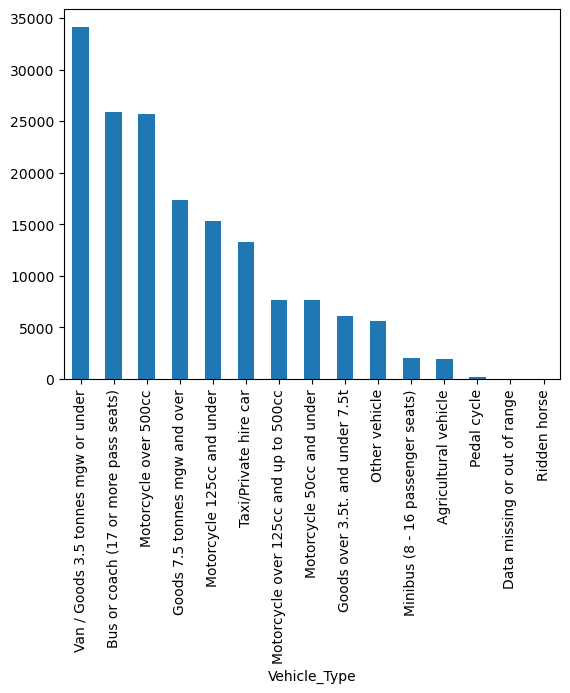

In [10]:
nocar_df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

<h1> <i>A Data Analysis Journey: From National Trends to Local Insights </i></h1>

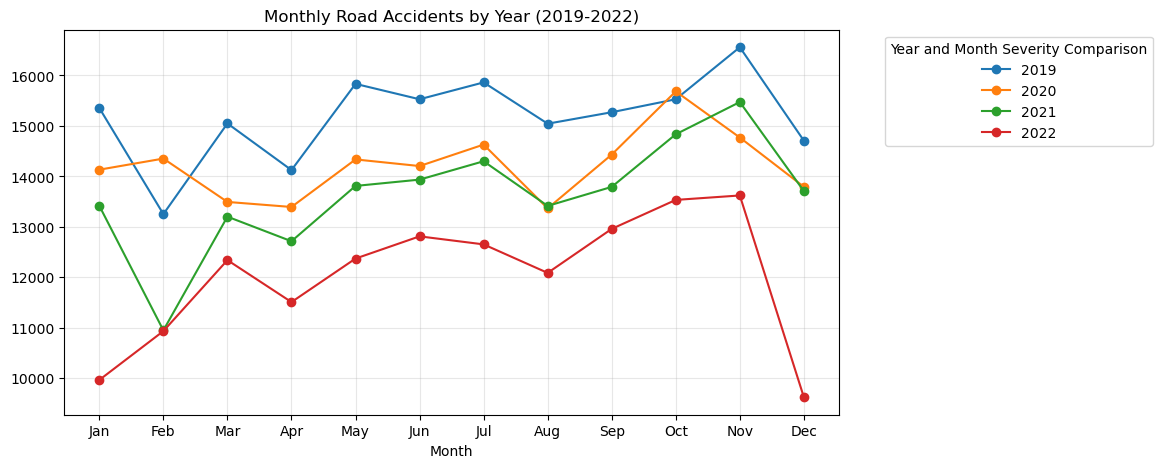

In [12]:
import matplotlib.pyplot as plt

# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = df.groupby(['Year', 'Month']).size()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2><i>Seasonal Analysis </i></h2>

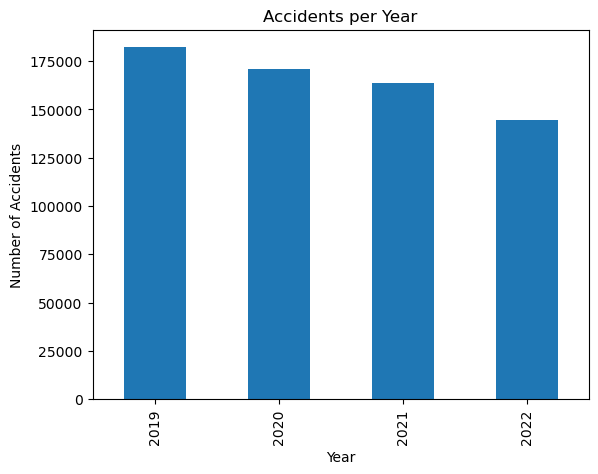

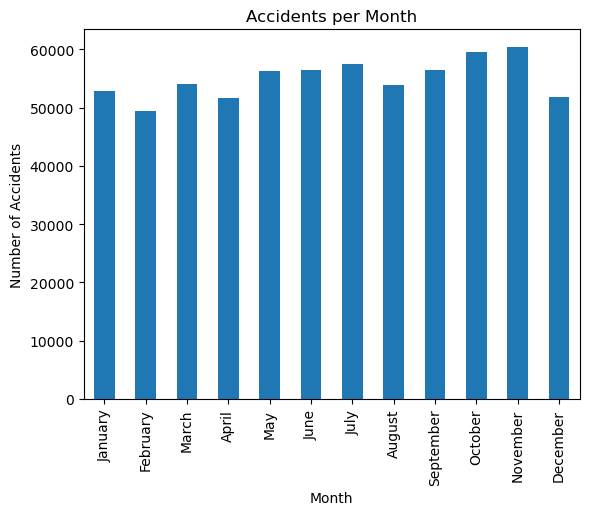

DayOfWeek
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64


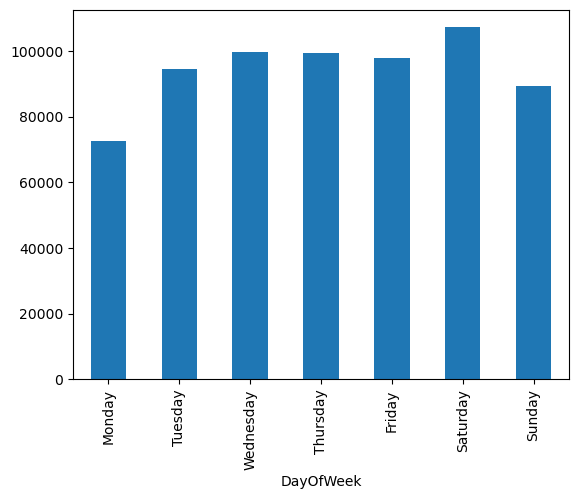

In [14]:
# Accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()
accidents_per_month = df['Month'].value_counts().sort_index()
accidents_per_day = df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [15]:
accidents_per_month = df['Month'].value_counts().sort_index()
accidents_per_month

Month
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
Name: count, dtype: int64

<h3>Accident Severity </h3>

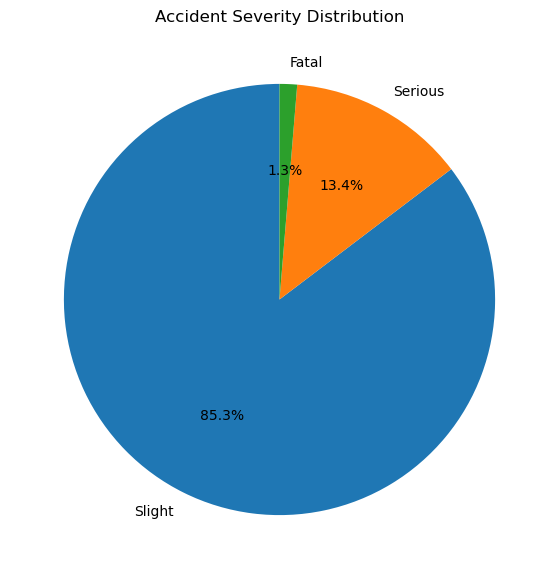

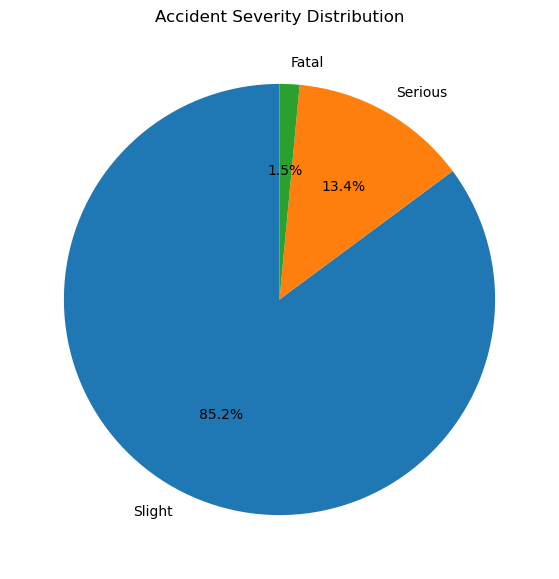

In [17]:
severity_counts = df['Accident_Severity'].value_counts()

plt.pie(severity_counts,
        labels = severity_counts.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019 = df[df['Year'] == 2019]
# severity_2019
sc_2019 = severity_2019['Accident_Severity'].value_counts()

plt.pie(sc_2019,
        labels = sc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h1>Using District Area to make a comparison to a general result </h1>
<h3>London Analysis</h3>


In [19]:
# df.dtypes
london_df = df[df['District Area'] == 'City of London']

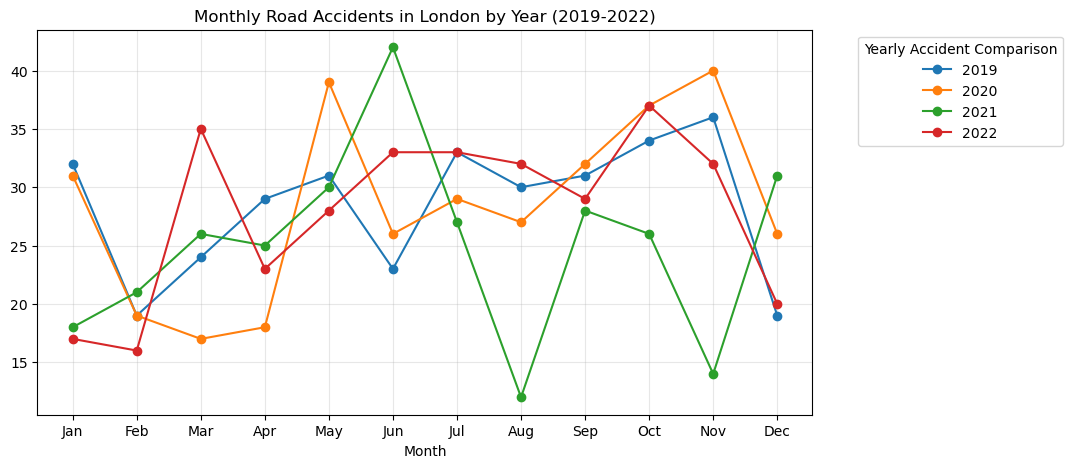

In [20]:
monthly_londondata = london_df.groupby(['Year', 'Month']).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in London by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

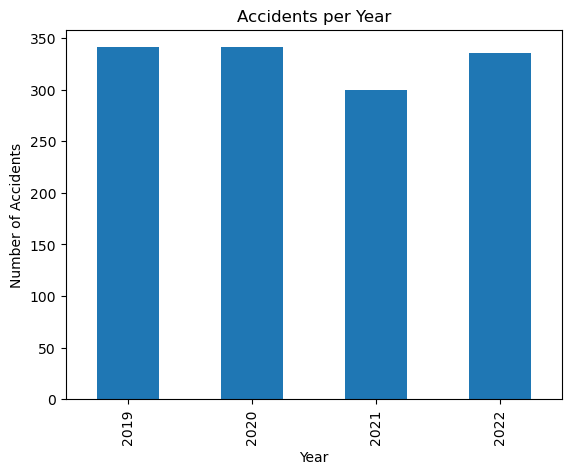

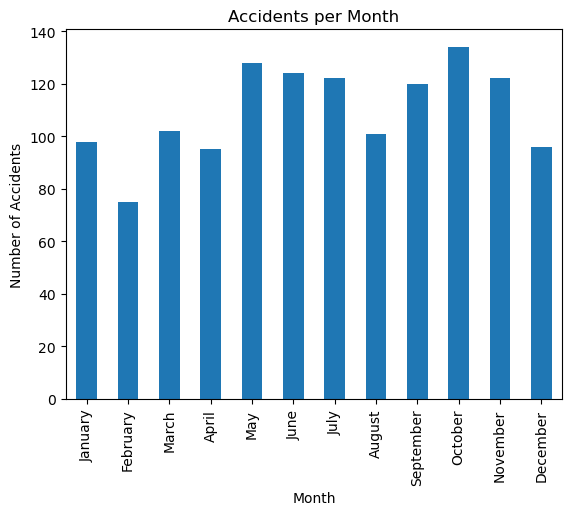

DayOfWeek
Monday        65
Tuesday      198
Wednesday    245
Thursday     244
Friday       249
Saturday     236
Sunday        80
Name: count, dtype: int64


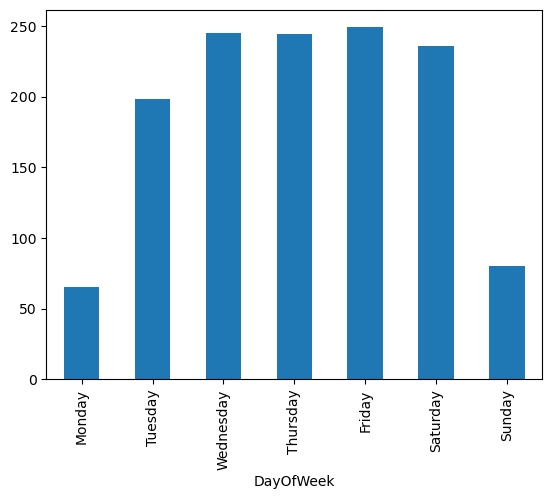

In [21]:
# Accidents per year
accidents_per_year = london_df['Year'].value_counts().sort_index()
accidents_per_month = london_df['Month'].value_counts().sort_index()
accidents_per_day = london_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h4><i>Accident Severity in London</i></h4>

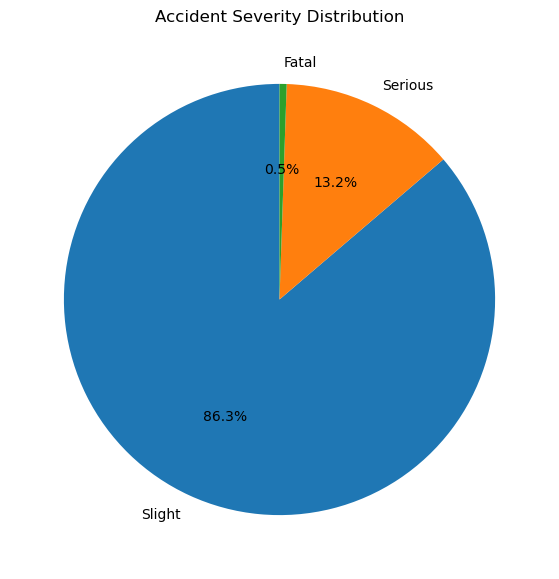

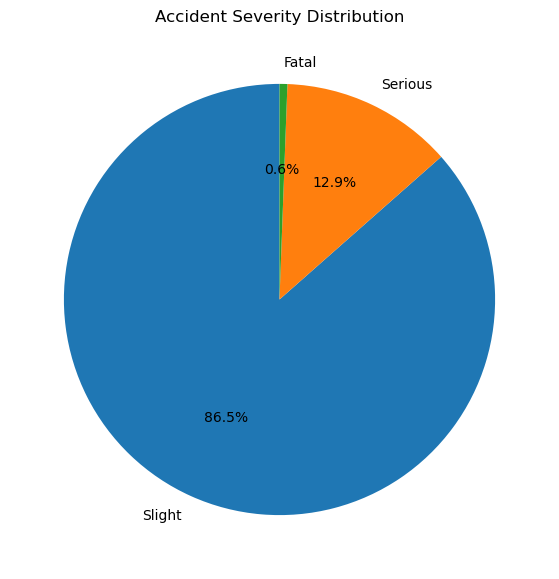

In [23]:
severity_london  = london_df['Accident_Severity'].value_counts()

plt.pie(severity_london,
        labels = severity_london.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_london = london_df[london_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_london['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


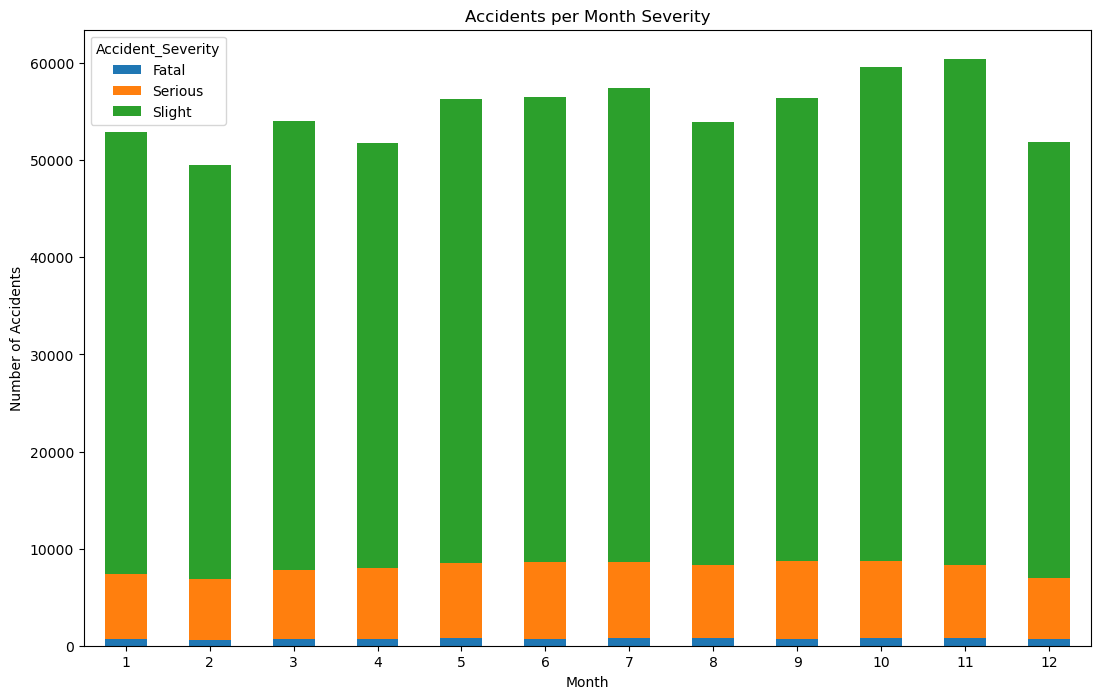

In [24]:
accidents_per_month_severity = df.groupby(['Month', 'Accident_Severity']).size().unstack()

accidents_per_month_severity.plot(kind ='bar', stacked = True)
plt.title('Accidents per Month Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(13, 8)
plt.show()

In [25]:
#Lewisham Liverpool Manchester Kensington and Chelsea Brentwood

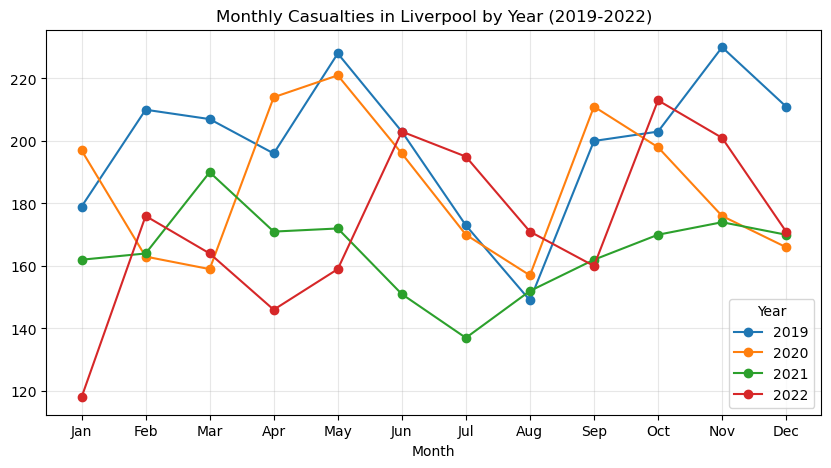

In [26]:
#Number of Casualties in Liverpool by Year (2019 - 2012)

liverpool_df = df[df['District Area'] == 'Liverpool']

#check code
# f = df[(df['Month'] == 1) & (df['Year'] == 2019) & (df['District Area'] == 'Liverpool')]
# f['Number_of_Casualties'].sum()

monthly_liverpooldata = liverpool_df.groupby(['Year', 'Month'])['Number_of_Casualties'].sum()
monthly_liverpooldata = monthly_liverpooldata.unstack(level=0)

monthly_liverpooldata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Casualties in Liverpool by Year (2019-2022)'
)

plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year')
plt.grid(alpha=0.3)
plt.show()

#INSIGHT - Based on the graph, the highest point was in May of 2019 having the most casualties in just one month with over 220 casualties.
#INSIGHT - The year with the most consistent amount throught the months is in (year) staying within the range of (amount)

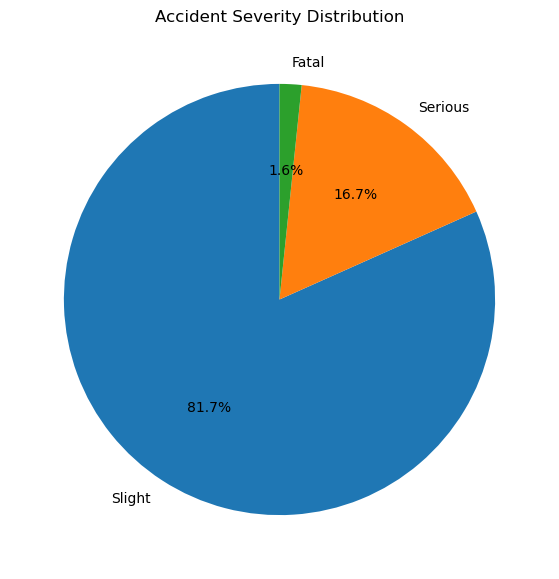

In [27]:
#Accident Severity in Brentwood

brentwood_df = df[df['District Area'] == 'Brentwood']

brentwood_severity  = brentwood_df['Accident_Severity'].value_counts()

plt.pie(brentwood_severity,
        labels = brentwood_severity.index,
        autopct = '%1.1f%%',
        startangle = 90)

plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

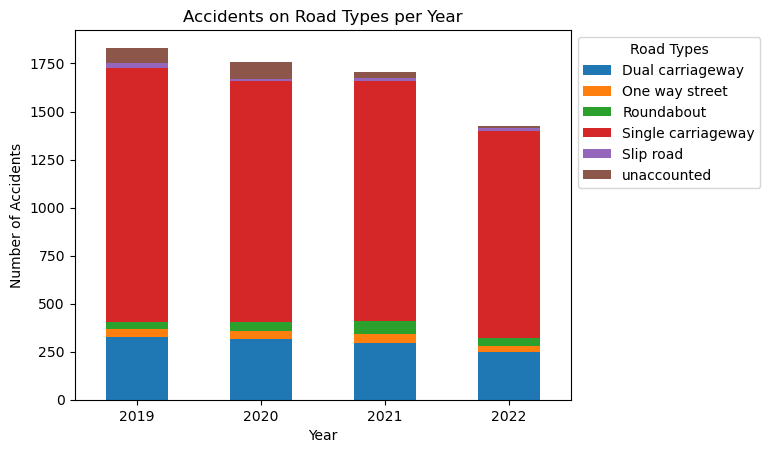

In [333]:
# Accidents on Manchester Roads per year
manchester_df = df[df['District Area'] == 'Manchester']

manchester_roads = manchester_df.groupby(['Year','Road_Type']).size().unstack()

manchester_roads.plot(kind='bar', stacked = True)
plt.title('Accidents on Road Types per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Road Types', bbox_to_anchor = (1,1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

#INSIGHT - Base on the bar graph, from 2019-2022 'Single carriageway' roads cause the most amount of accidents in Manchester with it staying around (amount) accident per year.

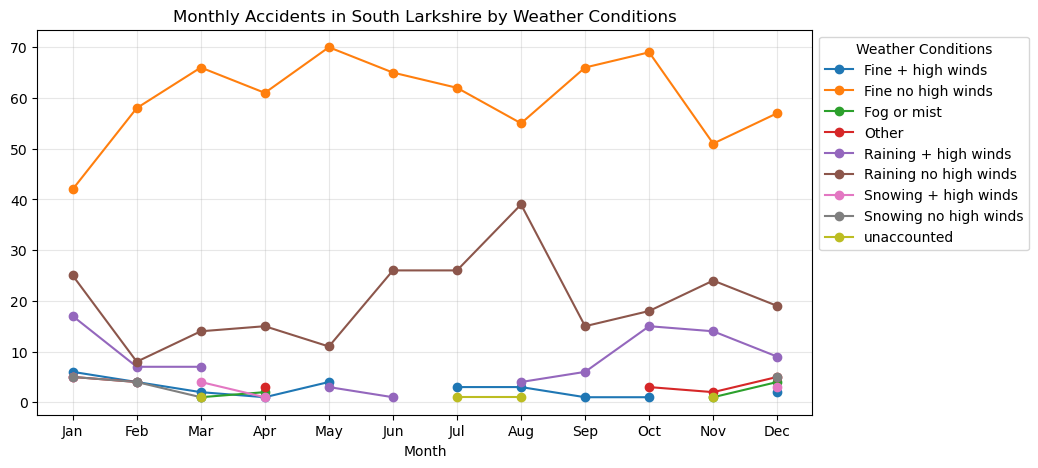

In [319]:
#Accidents in South Larkshire by Weather Conditions

larkshire_df = df[df['District Area'] == 'South Larkshire']

larkshire_weather = larkshire_df.groupby(['Weather_Conditions', 'Month']).size()
larkshire_weather = larkshire_weather.unstack(level=0)

larkshire_weather.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Accidents in South Larkshire by Weather Conditions'
)

plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Weather Conditions', bbox_to_anchor = (1,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()